In [2]:
import numpy as npy
from mindquantum.core import H, X, S, T
from mindquantum.core import Circuit
from mindquantum.simulator import Simulator
from mindquantum.core import Measure
from mindquantum.algorithm.library import qft

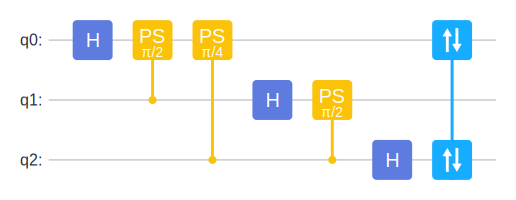

In [3]:
sim = Simulator('mqvector', 3)
qft_circuit = qft([0, 1, 2])
qft_circuit.svg()

In [4]:
from mindquantum.core.circuit import Circuit, SwapParts
from mindquantum.core.gates import H, PhaseShift
from mindquantum.utils.type_value_check import _check_input_type


In [5]:
def _rn(k):
    return PhaseShift(2 * npy.pi / (2 ** k))

def _qft_unit(qubits):
    circuit = Circuit(H.on(qubits[0]))
    for idx, ctrl_qubit in enumerate(qubits[1:]):
        circuit += _rn(idx + 2).on(qubits[0], ctrl_qubit)
    return circuit  

def qft(qubits):
    _check_input_type('qubits', (list, range), qubits)
    circuit = Circuit()
    n_qubits = len(qubits)
    for i in range(n_qubits):
        circuit += _qft_unit(qubits[i:])
    if n_qubits > 1:
        part1 = []
        part2 = []
        for j in range(n_qubits // 2):
            part1.append(qubits[j])
            part2.append(qubits[n_qubits - j - 1])
        circuit += SwapParts(part1, part2)
    return circuit

In [6]:
input_state_101 = Circuit()
input_state_101 += X.on(0)
input_state_101 += X.on(2)
#
circuit_101 = input_state_101 + qft_circuit
sim.reset()
sim.apply_circuit(circuit_101)
state_101 = sim.get_qs(ket=True)
print("对 |101> 状态进行 QFT 变换后的状态：")
print(state_101)

对 |101> 状态进行 QFT 变换后的状态：
√2/4¦000⟩
-√2/4¦001⟩
√2/4j¦010⟩
-√2/4j¦011⟩
(-1/4-1/4j)¦100⟩
(1/4+1/4j)¦101⟩
(1/4-1/4j)¦110⟩
(-1/4+1/4j)¦111⟩


In [7]:
# |111> 状态
input_state_111 = Circuit()
input_state_111 += X.on(0)
input_state_111 += X.on(1)
input_state_111 += X.on(2)
# 对 |111> 状态进行 QFT 变换
circuit_111 = input_state_111 + qft_circuit
sim.reset()
sim.apply_circuit(circuit_111)
state_111 = sim.get_qs(ket=True)
print("对 |111> 状态进行 QFT 变换后的状态：")
print(state_111)

对 |111> 状态进行 QFT 变换后的状态：
√2/4¦000⟩
-√2/4¦001⟩
-√2/4j¦010⟩
√2/4j¦011⟩
(1/4-1/4j)¦100⟩
(-1/4+1/4j)¦101⟩
(-1/4-1/4j)¦110⟩
(1/4+1/4j)¦111⟩


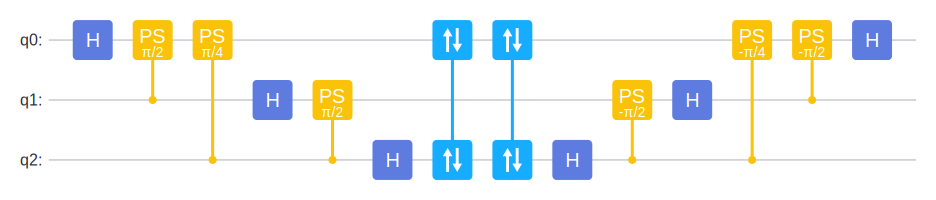

In [8]:
iqft_circuit = qft_circuit.hermitian()
qft_iqft_circuit = qft_circuit + iqft_circuit
qft_iqft_circuit.svg()

In [9]:
full_circuit_101 = input_state_101 + qft_iqft_circuit

sim.reset()
sim.apply_circuit(full_circuit_101)
final_state_101 = sim.get_qs(ket=True)

print("对 |101> 状态进行 QFT 变换后再进行逆 QFT 变换后的状态：")
print(final_state_101)

对 |101> 状态进行 QFT 变换后再进行逆 QFT 变换后的状态：
1¦101⟩


In [10]:
full_circuit_111 = input_state_111 + qft_iqft_circuit

sim.reset()
sim.apply_circuit(full_circuit_111)
final_state_111 = sim.get_qs(ket=True)

print("对 |111> 状态进行 QFT 变换后再进行逆 QFT 变换后的状态：")
print(final_state_111)

对 |111> 状态进行 QFT 变换后再进行逆 QFT 变换后的状态：
1¦111⟩
